**Objective**: to create a Machine Learning model capable of predicting the outcomes of football games in the 2018 FIFA World Cup.

**Features**: Results of historical matches since the beginning of the championship (1930) for all participating teams.

First step: import the necessary packages and read the files into pandas Dataframes
Dataset results taken from Kaggle consists of a historical records of roughly all international matches played since... well, since the origins of football!

In [234]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
# Read .csv files
results = pd.read_csv('datasets/results.csv')

In [236]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland


## Data Exploration and Manipulation

In [237]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38902 entries, 0 to 38901
Data columns (total 8 columns):
date          38902 non-null object
home_team     38902 non-null object
away_team     38902 non-null object
home_score    38902 non-null int64
away_score    38902 non-null int64
tournament    38902 non-null object
city          38902 non-null object
country       38902 non-null object
dtypes: int64(2), object(6)
memory usage: 2.4+ MB


**Feature Engineering**:Doing Feature Engineering and adding three more columns to the dataframe as a features which are winning_team,goal_difference and match_year

In [238]:
# Adding new column for winner of each match
winner = []
for i in range(len(results['home_team'])):
    if results['home_score'][i] > results['away_score'][i]:
        winner.append(results['home_team'][i])
    elif results['home_score'][i] < results['away_score'][i]:
        winner.append(results['away_team'][i])
    else:
        winner.append('Tie')
results['winning_team'] = winner

# Adding new column for goal difference in matches
results['goal_difference'] = np.absolute(results['home_score'] - results['away_score'])

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,Tie,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,Tie,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,Scotland,3


In [239]:
# Loop for creating a new column 'year'
year = []
for row in results['date']:
    year.append(int(row[:4]))
results['match_year'] = year

In [240]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference,match_year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,Tie,0,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,England,2,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,Scotland,1,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,Tie,0,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,Scotland,3,1876


 prediction variable is **winning_team
 1-->Tie  2-->Home team won  0-->Away Team Won**

In [241]:
# our prediction variable is winning_team
results = results.reset_index(drop=True)
results.loc[results.winning_team == results.home_team, 'winning_team']= 2
results.loc[results.winning_team == 'Tie', 'winning_team']= 1
results.loc[results.winning_team == results.away_team, 'winning_team']= 0

In [242]:
results.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference,match_year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,1,0,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,2,2,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,2,1,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,1,0,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,2,3,1876
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,2,4,1876
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,0,2,1877
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,0,2,1877
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,2,5,1878
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,2,9,1878


In [243]:
dataset=results

In [244]:
dataset.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'winning_team', 'goal_difference',
       'match_year'],
      dtype='object')

All seems to be well. We have a dataset of a reasonable size to train our model. Now, let's drop all the columns we are not going to use (unfortunately, the majority of them).

In [245]:
dataset = dataset.drop(['date'],axis=1)

In [246]:
dataset.head(5)

,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference,match_year
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,1,0,1872
1,England,Scotland,4,2,Friendly,London,England,2,2,1873
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,2,1,1874
3,England,Scotland,2,2,Friendly,London,England,1,0,1875
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,2,3,1876


In [247]:
dataset=dataset.drop(['tournament','city','country'],axis=1)

In [248]:
dataset.head()

,home_team,away_team,home_score,away_score,winning_team,goal_difference,match_year
0,Scotland,England,0,0,1,0,1872
1,England,Scotland,4,2,2,2,1873
2,Scotland,England,2,1,2,1,1874
3,England,Scotland,2,2,1,0,1875
4,Scotland,England,3,0,2,3,1876


In [249]:
data=dataset

In [250]:
#Label Encoding of Categorical variables
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
dataset['home_team']=lb.fit_transform(dataset['home_team'])
dataset['away_team']=lb.fit_transform(dataset['away_team'])

In [251]:
dataset.head()

,home_team,away_team,home_score,away_score,winning_team,goal_difference,match_year
0,182,64,0,0,1,0,1872
1,64,180,4,2,2,2,1873
2,182,64,2,1,2,1,1874
3,64,180,2,2,1,0,1875
4,182,64,3,0,2,3,1876


## Visualization of Correlation Matrix

In [252]:
dataset.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'winning_team',
       'goal_difference', 'match_year'],
      dtype='object')

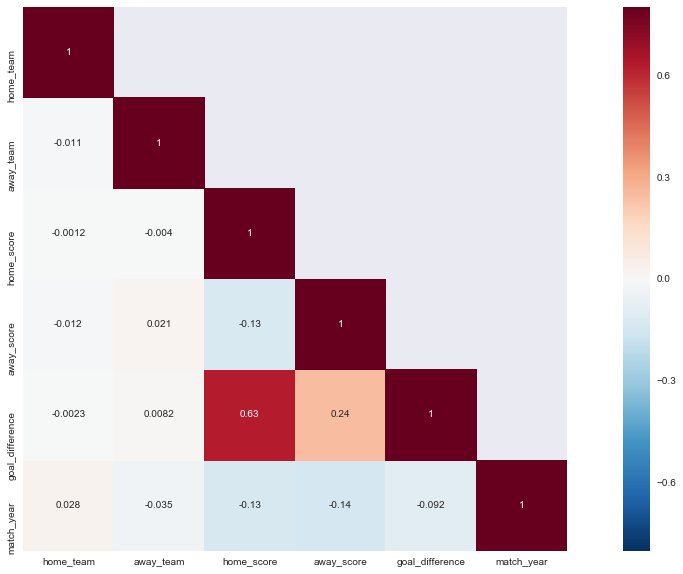

In [253]:
import matplotlib.pyplot as plt
%matplotlib inline
corrMatt = dataset[['home_team', 'away_team', 'home_score', 'away_score', 'goal_difference',
       'match_year', 'winning_team']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

As we can see goal_difference and home score are highy correlated so we have to remove any one but first let consider 
which variables are important are not

## Feature Importance

In [254]:
# Separate X and y sets
X = dataset.drop(['winning_team'], axis=1)
y = dataset["winning_team"]
y = y.astype('int')

Feature ranking:
1. feature 4 (0.432247)
2. feature 2 (0.296505)
3. feature 3 (0.271248)
4. feature 5 (0.000000)
5. feature 1 (0.000000)
6. feature 0 (0.000000)


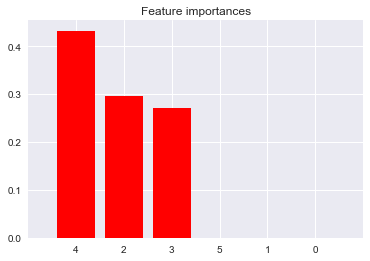

In [255]:
from sklearn import tree

y = y.values
X = X.values
# Build a forest and compute the feature importances

clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X,y)
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

So Important features are

1. Goal Difference
2. Home Score
3. Away Score

In [256]:
# Lets Consider all the features only remving match_year in the dataset
results=results.drop(['date','match_year','tournament','city','country'],axis=1)

In [257]:
results.head()

,home_team,away_team,home_score,away_score,winning_team,goal_difference
0,Scotland,England,0,0,1,0
1,England,Scotland,4,2,2,2
2,Scotland,England,2,1,2,1
3,England,Scotland,2,2,1,0
4,Scotland,England,3,0,2,3


In [258]:
results=results.drop(['home_score','away_score','goal_difference'],axis=1)

In [259]:
results.head()

,home_team,away_team,winning_team
0,Scotland,England,1
1,England,Scotland,2
2,Scotland,England,2
3,England,Scotland,1
4,Scotland,England,2


## Model Building

In [260]:
# Get dummy variables
final = pd.get_dummies(results, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

In [261]:
from sklearn.model_selection import train_test_split

# Separate X and y sets
X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
y = y.astype('int')

# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Comparison of different classifiers

### Logistic Regression

In [262]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)
train_predictions = logreg.predict(X_test)
acc = accuracy_score(y_test, train_predictions)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))
print("accuracy: ", '%.3f'%(acc))

Training set accuracy:  0.580
Test set accuracy:  0.565
accuracy:  0.565


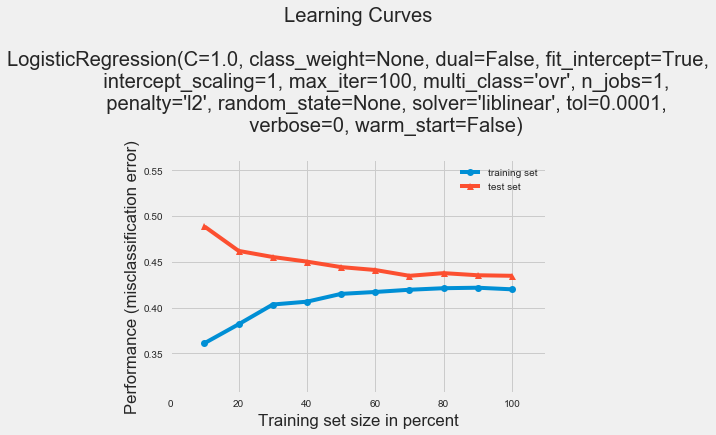

In [183]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, logreg)
plt.show()

### Random Forest

In [184]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
clf=RandomForestClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_train, y_train)
score2 = clf.score(X_test, y_test)
train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))
print("accuracy: ", '%.3f'%(acc))

Training set accuracy:  0.690
Test set accuracy:  0.505
accuracy:  0.505


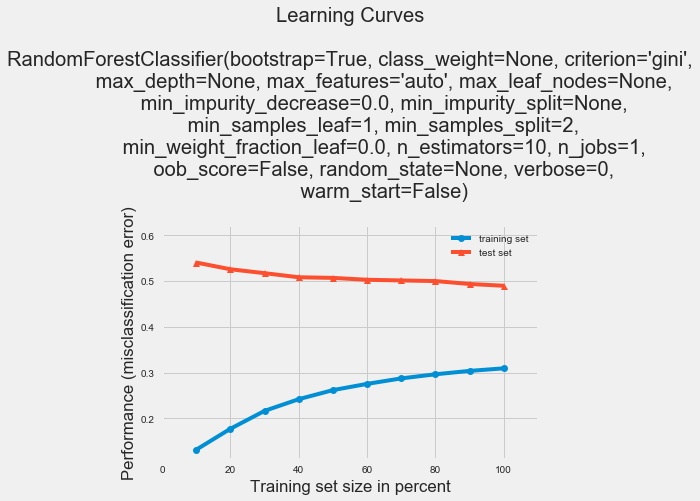

In [185]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, clf)
plt.show()

### AdaBoost

In [186]:
clf=AdaBoostClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_train, y_train)
score2 = clf.score(X_test, y_test)
train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)



print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))
print("accuracy: ", '%.3f'%(acc))


Training set accuracy:  0.522
Test set accuracy:  0.522
accuracy:  0.522


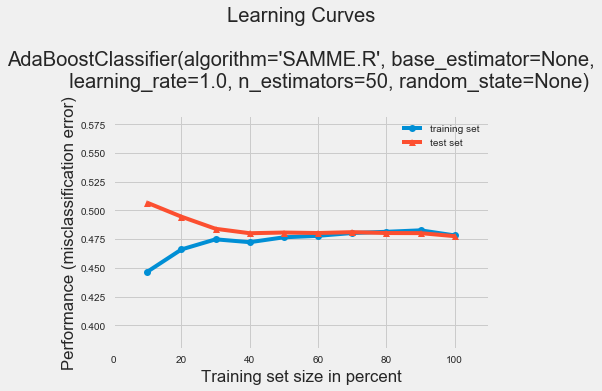

In [187]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, clf)
plt.show()

### Gradient Boosting

In [188]:
clf=GradientBoostingClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_train, y_train)
score2 = clf.score(X_test, y_test)
train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))
print("accuracy: ", '%.3f'%(acc))

Training set accuracy:  0.517
Test set accuracy:  0.513
accuracy:  0.513


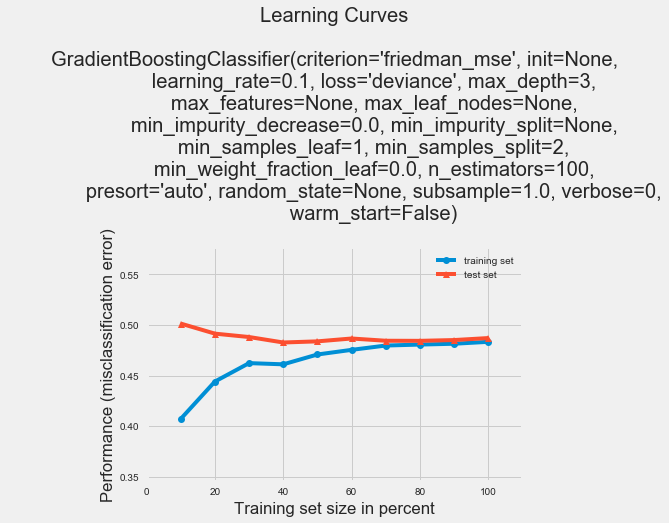

In [189]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, clf)
plt.show()

### Neural Network Classifier

In [281]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(150, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', 
                  learning_rate='constant', learning_rate_init=0.0001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, 
                  tol=0.001, verbose=False, warm_start=False, momentum=0.9, 
                  nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, 
                  epsilon=1e-08)
clf.fit(X_train, y_train)
score = clf.score(X_train, y_train)
score2 = clf.score(X_test, y_test)
train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))
print("accuracy: ", '%.3f'%(acc))

Training set accuracy:  0.602
Test set accuracy:  0.560
accuracy:  0.560


Among all above classifiers we can say Logistic Regression Performs best as there is no Misclassification error at all. So let us consider Logistic Regression for final Prediction

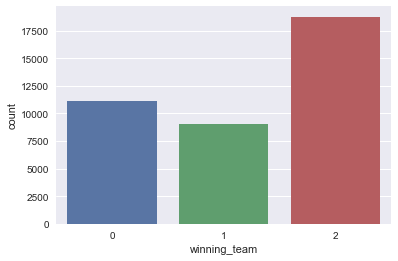

In [190]:
sns.countplot(x='winning_team', data=results)

We have Highest win percentage of home team from previous data

###  Prediction for 2018 FIFA World Cup data


In [191]:
# Loading new datasets
ranking = pd.read_csv('datasets/fifa_rankings.csv') # Obtained from https://us.soccerway.com/teams/rankings/fifa/?ICID=TN_03_05_01
fixtures = pd.read_csv('datasets/fixtures.csv') # Obtained from https://fixturedownload.com/results/fifa-world-cup-2018

# List for storing the group stage games
pred_set = []

In [192]:
# Create new columns with ranking position of each team
fixtures.insert(1, 'first_position', fixtures['Home Team'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Away Team'].map(ranking.set_index('Team')['Position']))

# We only need the group stage games, so we have to slice the dataset
fixtures = fixtures.iloc[:48, :]
fixtures.tail()

,Round Number,first_position,second_position,Date,Location,Home Team,Away Team,Group,Result
43,3,6.0,25.0,27/06/2018 21:00,Nizhny Novgorod Stadium,Switzerland,Costa Rica,Group E,NaN
44,3,60.0,10.0,28/06/2018 17:00,Volgograd Stadium,Japan,Poland,Group H,NaN
45,3,28.0,16.0,28/06/2018 17:00,Samara Stadium,Senegal,Colombia,Group H,NaN
46,3,55.0,14.0,28/06/2018 21:00,Saransk Stadium,Panama,Tunisia,Group G,NaN
47,3,13.0,3.0,28/06/2018 21:00,Kaliningrad Stadium,England,Belgium,Group G,NaN


In [193]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'home_team': row['Home Team'], 'away_team': row['Away Team'], 'winning_team': None})
    else:
        pred_set.append({'home_team': row['Away Team'], 'away_team': row['Home Team'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set

pred_set.head()

,away_team,home_team,winning_team
0,Saudi Arabia,Russia,None
1,Egypt,Uruguay,None
2,Morocco,Iran,None
3,Spain,Portugal,None
4,Australia,France,None


In [194]:
# Get dummy variables and drop winning_team column
pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

In [195]:
pred_set.columns

Index(['winning_team', 'home_team_Argentina', 'home_team_Belgium',
       'home_team_Brazil', 'home_team_Colombia', 'home_team_Costa Rica',
       'home_team_Croatia', 'home_team_Denmark', 'home_team_Egypt',
       'home_team_England', 'home_team_France', 'home_team_Germany',
       'home_team_Iceland', 'home_team_Iran', 'home_team_Mexico',
       'home_team_Peru', 'home_team_Poland', 'home_team_Portugal',
       'home_team_Russia', 'home_team_Senegal', 'home_team_Spain',
       'home_team_Sweden', 'home_team_Switzerland', 'home_team_Tunisia',
       'home_team_Uruguay', 'away_team_Australia', 'away_team_Colombia',
       'away_team_Costa Rica', 'away_team_Croatia', 'away_team_Denmark',
       'away_team_Egypt', 'away_team_England', 'away_team_Iceland',
       'away_team_Iran', 'away_team_Japan', 'away_team_Korea Republic',
       'away_team_Mexico', 'away_team_Morocco', 'away_team_Nigeria',
       'away_team_Panama', 'away_team_Peru', 'away_team_Russia',
       'away_team_Saudi Arabia

In [196]:
# Add missing columns compared to the model's training dataset
# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]
# Remove winning team column
pred_set = pred_set.drop(['winning_team'], axis=1)

pred_set.head()

,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_American Samoa,home_team_Andorra,home_team_Angola,home_team_Anguilla,home_team_Antigua and Barbuda,home_team_Argentina,home_team_Armenia,...,away_team_Virgin Islands,away_team_Wales,away_team_Wallis Islands and Futuna,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zanzibar,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Deploy the model

In [197]:
predictions = logreg.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 2:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    elif predictions[i] == 1:
        print("Tie")
    elif predictions[i] == 0:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
    print('Probability of Tie: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1]))
    print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
    print("")


Russia and Saudi Arabia
Winner: Russia
Probability of Russia winning:  0.723
Probability of Tie:  0.133
Probability of Saudi Arabia winning:  0.145

Uruguay and Egypt
Winner: Uruguay
Probability of Uruguay winning:  0.579
Probability of Tie:  0.348
Probability of Egypt winning:  0.073

Iran and Morocco
Winner: Iran
Probability of Iran winning:  0.483
Probability of Tie:  0.316
Probability of Morocco winning:  0.201

Portugal and Spain
Winner: Spain
Probability of Portugal winning:  0.285
Probability of Tie:  0.328
Probability of Spain winning:  0.387

France and Australia
Winner: France
Probability of France winning:  0.643
Probability of Tie:  0.201
Probability of Australia winning:  0.156

Argentina and Iceland
Winner: Argentina
Probability of Argentina winning:  0.821
Probability of Tie:  0.135
Probability of Iceland winning:  0.044

Peru and Denmark
Winner: Peru
Probability of Peru winning:  0.417
Probability of Tie:  0.208
Probability of Denmark winning:  0.375

Croatia and Nigeri

**How to improve Accuracy**

1. Hyperparametric Tuning
2. Increase More Features